# **First Step, Input the dataset**

## Input the dataset from the tf. And I separated into training and testing.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape, type(x_train))
print(y_train.shape, type(y_train))


(60000, 28, 28) <class 'numpy.ndarray'>
(60000,) <class 'numpy.ndarray'>


## Show some picture in the training datasets

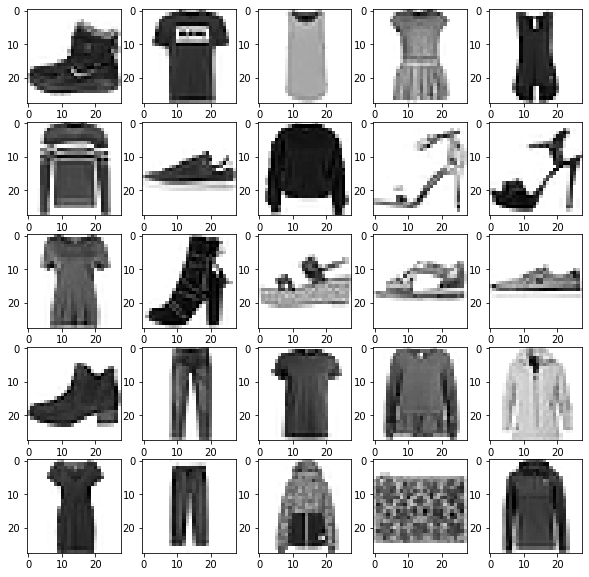

In [ ]:
plt.figure(figsize=(10,10)) 
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(x_train[i],cmap=plt.cm.binary)
 
plt.show()

## Show some picture in the testing datasets

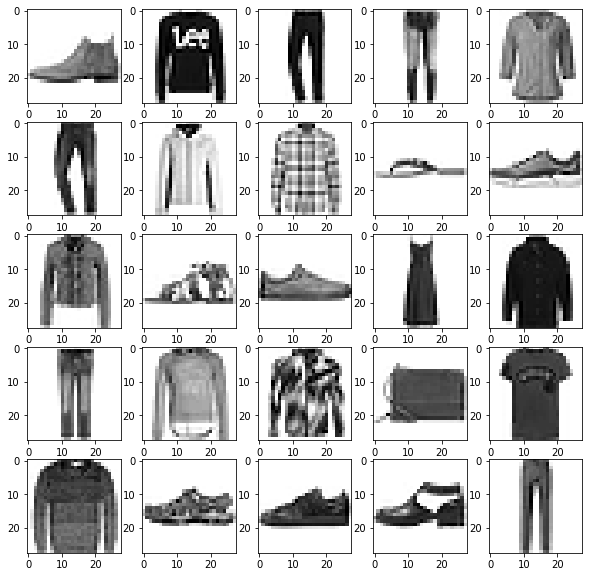

In [ ]:
plt.figure(figsize=(10,10)) 
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(x_test[i],cmap=plt.cm.binary)
 
plt.show()

## Change the img from [28,28] to [784,]

In [ ]:
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)
print(X_train.shape, type(X_train))
print(X_test.shape, type(X_test))

(60000, 784) <class 'numpy.ndarray'>
(10000, 784) <class 'numpy.ndarray'>


## Change the data's type into float32 and uniform them

In [ ]:

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

label, count = np.unique(y_train, return_counts=True)
print(label, count)

[0 1 2 3 4 5 6 7 8 9] [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


## Show the overview of the dataset

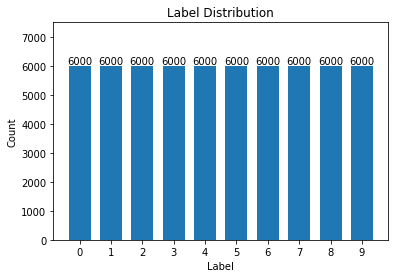

In [ ]:
fig = plt.figure()
plt.bar(label, count, width = 0.7, align='center')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(label)
plt.ylim(0,7500)

for a,b in zip(label, count):
    plt.text(a, b, '%d' % b, ha='center', va='bottom',fontsize=10)

plt.show()

# **Second Step, Use the Linear classifier to classify**

## I use the GaussianNB to classify the img

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train, y_train)
y_model = model.predict(X_train)
accuracy_score(y_model, y_train)

0.5877833333333333

In [ ]:
y_model = model.predict(X_test)
accuracy_score(y_model, y_test)

0.5856

As we can see, the accurancy of the GaussianNB is only 58.6%, that is not a good result.



## Show the results as the confusion matrix

Text(91.68, 0.5, 'true value')

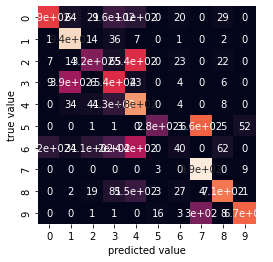

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

There are 10 classes in this picture as you can see.

## If we use the SVC, it will get the better the results

In [ ]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(X_train,y_train)
y_pred = lsvc.predict(X_test)


sum=0.0
for i in range(10000):
    if(y_pred[i] == y_test[i]):
        sum = sum+1
    
print('Test set score: %f' % (sum/10000.))

Test set score: 0.839400


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


If we use the SVC, it would have a big promotion! So, maybe we could say SVC is much more suitable for the Fashion-Mnist datasets.

# **Third Step, Deep classifier**

In this section, I hope to use the fully connected neural network to deal this datasets.

## Set up the model

In [ ]:
Sequential = tf.keras.models.Sequential
Dense = tf.keras.layers.Dense
Activation = tf.keras.layers.Activation

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 512)               401920    
                                                                 
 activation_15 (Activation)  (None, 512)               0         
                                                                 
 dense_24 (Dense)            (None, 512)               262656    
                                                                 
 activation_16 (Activation)  (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 10)                5130      
                                                                 
 activation_17 (Activation)  (None, 10)                0         
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-t

## Set up the optimizer-compile(), then train the model and outpot the results

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:

history = model.fit(X_train,
                    y_train,
                    batch_size=128,
                    epochs=5,
                    verbose=2, 
                    validation_data=(X_test, y_test))

Epoch 1/5
469/469 - 2s - loss: 0.4744 - accuracy: 0.8297 - val_loss: 0.4539 - val_accuracy: 0.8347 - 2s/epoch - 5ms/step
Epoch 2/5
469/469 - 2s - loss: 0.3511 - accuracy: 0.8718 - val_loss: 0.3569 - val_accuracy: 0.8695 - 2s/epoch - 4ms/step
Epoch 3/5
469/469 - 2s - loss: 0.3143 - accuracy: 0.8835 - val_loss: 0.3804 - val_accuracy: 0.8543 - 2s/epoch - 4ms/step
Epoch 4/5
469/469 - 2s - loss: 0.2927 - accuracy: 0.8906 - val_loss: 0.3449 - val_accuracy: 0.8763 - 2s/epoch - 4ms/step
Epoch 5/5
469/469 - 2s - loss: 0.2748 - accuracy: 0.8968 - val_loss: 0.3423 - val_accuracy: 0.8770 - 2s/epoch - 4ms/step


As we can see, the accuracy is 87.7% after 5 epoch.

# **Fourth Step, use CNN**

## Firstly, I should deal the original datasets, because it's different of the others, if we hope to use CNN to deal it.

If you want to run this section by yourselves, you should reload the datasets, which you should run the first section( Input the dataset ) before that. Because we should reshape the data.

In [ ]:
from tensorflow.keras.utils import to_categorical
img_x, img_y = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape)

(60000, 10)


## Set up the model

In [ ]:
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Flatten
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=(img_x, img_y, 1)))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1024)              0         
                                                                 
 dense_32 (Dense)            (None, 1000)            

##Set up the optimizer-compile(), then train the model and outpot the results

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=10)


Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0152 - accuracy: 0.9946
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0150 - accuracy: 0.9948
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0157 - accuracy: 0.9948
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0101 - accuracy: 0.9966
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0164 - accuracy: 0.9945
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0114 - accuracy: 0.9961
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0128 - accuracy: 0.9958
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0171 - accuracy: 0.9944
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0147 - accuracy: 0.9951
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0097 - accuracy: 0.996

In [ ]:
score = model.evaluate(x_test, y_test)
print('acc', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.7550 - accuracy: 0.9149
acc 0.914900004863739


As we can see, the accuracy is 91.5% after 10 epoch. 

# **Conclusion**# 

## Which classifier worked better?

That is very obvious, CNN is the best one.


> Accurancy

1.   Linear classifier: 58.6% / 83.9%
2.   Deep classifier:   87.7%
3.   Convolutional Neural Network: 91.5%





## Why CNN works better than the others

CNN convolves learned features with input data, and uses 2D convolutional layers, making this architecture well suited to processing 2D data, especially in the images. 

It is the automated feature extraction that makes CNNs highly suited for and accurate for computer vision tasks such as object/image classification

##  Ideas for future work



1.   For the traditional classifier, if we could choose the suitable algorithm, we could also get a nice result.


2.   For the CNN:
*   Nowadays, there are many libraries we could choose to build and train our model, which we should select the easy one, such as the keras. In this process, I tried many ways to build and train my model, and I also met many problems, such as compatibility and operation time-out(because of the colab). So, selecting the good and easy method to build and train our model is the first step when we should do.
Then, how to optimize our code to reduce the calculation is also one of the most important thing we should consider in the next time.

*   Choose the suitable functions of loss, optimizer and etc for CNN's complier. There are many function in TF, so we should deeply research each of them, which could help me to select the best one applied in our task.












